In [122]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [124]:
bike = pd.read_csv("day.csv")

In [125]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Analyzing the test data

In [126]:
bike.shape

(730, 16)

In [127]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Based on above output, there is no empty value in the test data.

In [128]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation - Creating Dummy Variables for season and weathersit column and extracting the day column from date column

In [129]:
bike['season'] = bike['season'].astype('int')

In [130]:
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

bike['seasonString'] = bike['season'].map(season_dict)

In [131]:
bike['seasonString'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: seasonString, dtype: int64

In [132]:
# Dropping season column as new column is created with Strings
bike.drop(['season'], axis = 1, inplace = True)

In [133]:
bike.shape

(730, 16)

In [134]:
# Extract dummy variables for the feature 'Season' and storing that in a new variable - 'season'
season = pd.get_dummies(bike['seasonString'], drop_first = True)

In [135]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [136]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, season], axis = 1)

In [137]:
bike.shape

(730, 19)

In [138]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasonString,spring,summer,winter
0,1,01-01-2018,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,1,0,0
1,2,02-01-2018,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,1,0,0
2,3,03-01-2018,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,1,0,0
3,4,04-01-2018,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,1,0,0
4,5,05-01-2018,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,1,0,0


In [139]:
# Dropping seasonString column as dummy columns are concatinated with main df
bike.drop(['seasonString'], axis = 1, inplace = True)

In [140]:
bike.shape

(730, 18)

In [141]:
weather_dict = {1: 'clear', 2: 'cloudy', 3: 'snowy', 4: 'rainy'}

bike['weathersitString'] = bike['weathersit'].map(weather_dict)

In [142]:
bike.shape

(730, 19)

In [143]:
bike['weathersitString'].value_counts()

clear     463
cloudy    246
snowy      21
Name: weathersitString, dtype: int64

In [144]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [145]:
# Dropping weathersit column as new column is created with Strings
bike.drop(['weathersit'], axis = 1, inplace = True)

In [146]:
bike.shape

(730, 18)

In [147]:
# Extract dummy variables for the feature 'weathersit' and storing that in a new variable - 'weather'
weather = pd.get_dummies(bike['weathersitString'])

In [148]:
weather.head()

,clear,cloudy,snowy
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [149]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weather], axis = 1)

# Dropping seasonString column as dummy columns are concatinated with main df
bike.drop(['weathersitString'], axis = 1, inplace = True)

In [150]:
bike.shape

(730, 20)

In [151]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,clear,cloudy,snowy
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,1,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,1,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,1,0,0


In [152]:
# converting the dteday column to datetime format and extracted the day from this column and created a new column - day

bike['dteday']=pd.to_datetime(bike['dteday'])
bike['day']=bike['dteday'].dt.day
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,spring,summer,winter,clear,cloudy,snowy,day
0,1,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,...,331,654,985,1,0,0,0,1,0,1
1,2,2018-02-01,0,1,0,0,0,14.902598,17.68695,69.6087,...,131,670,801,1,0,0,0,1,0,1
2,3,2018-03-01,0,1,0,1,1,8.050924,9.47025,43.7273,...,120,1229,1349,1,0,0,1,0,0,1
3,4,2018-04-01,0,1,0,2,1,8.200000,10.60610,59.0435,...,108,1454,1562,1,0,0,1,0,0,1
4,5,2018-05-01,0,1,0,3,1,9.305237,11.46350,43.6957,...,82,1518,1600,1,0,0,1,0,0,1


## Visualising the Data

### Visualising all Numeric Variables

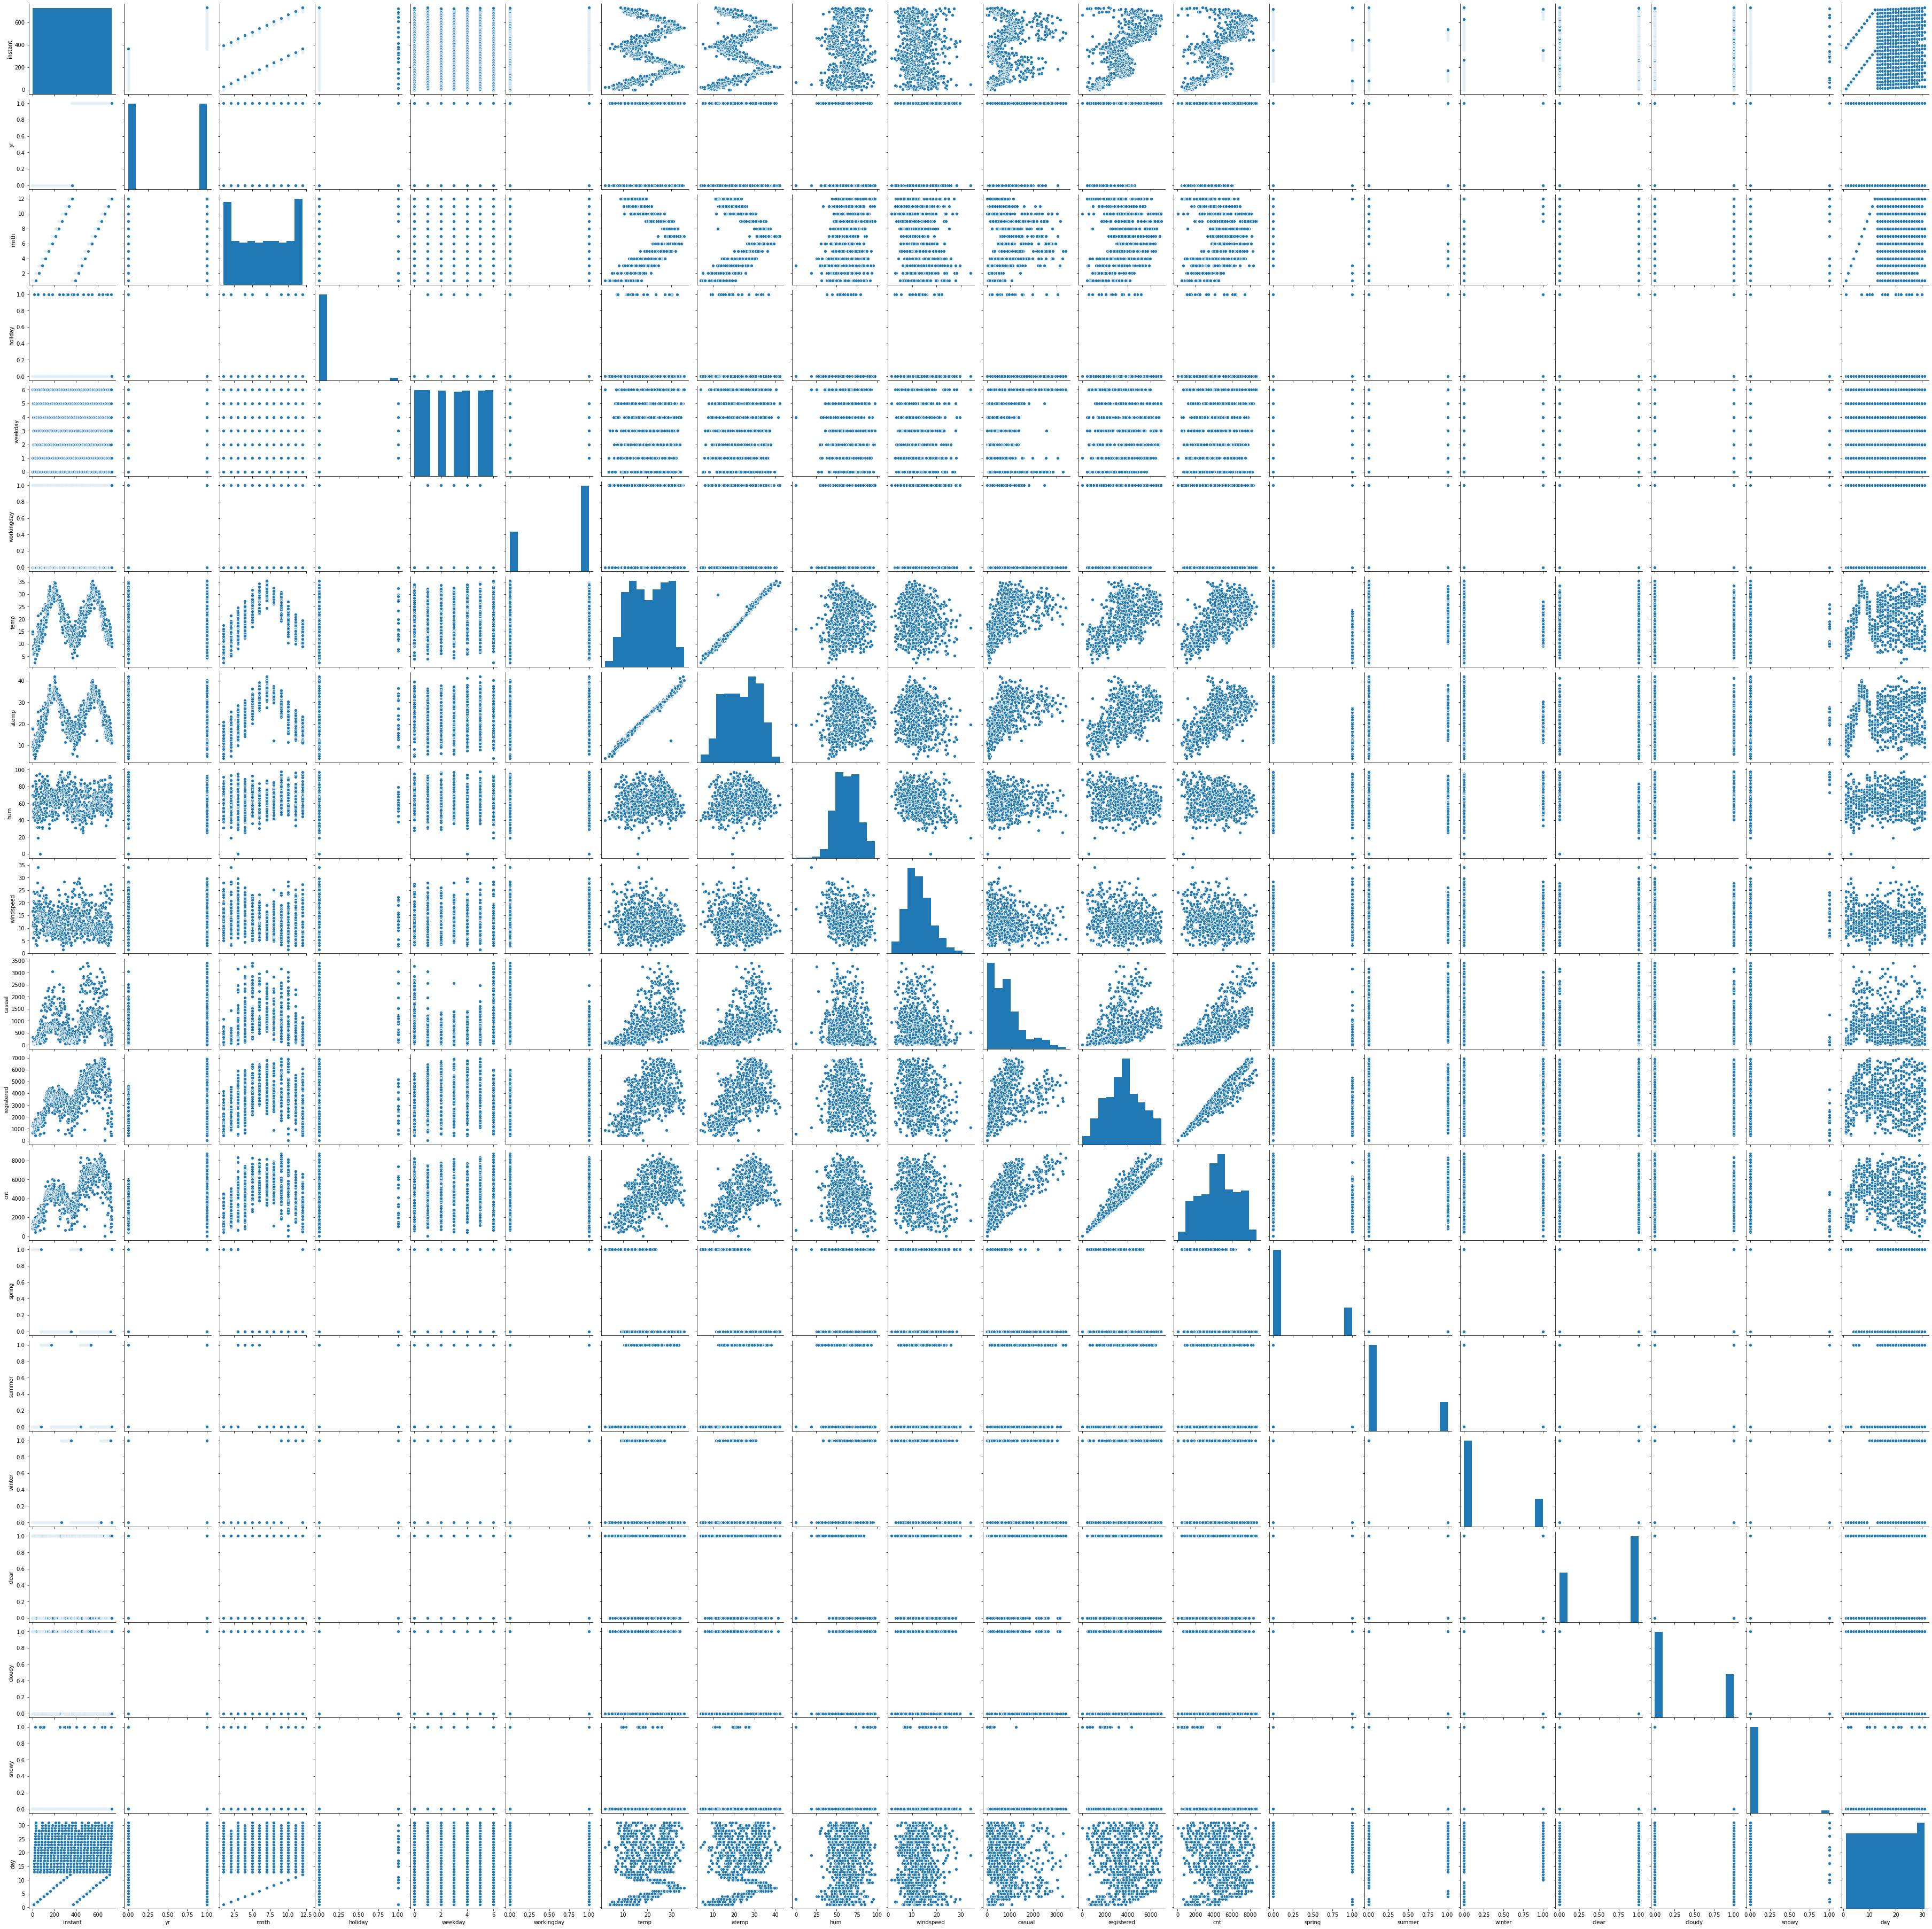

In [56]:
sns.pairplot(bike)
plt.show()

### Visualising Categorical Variables separately

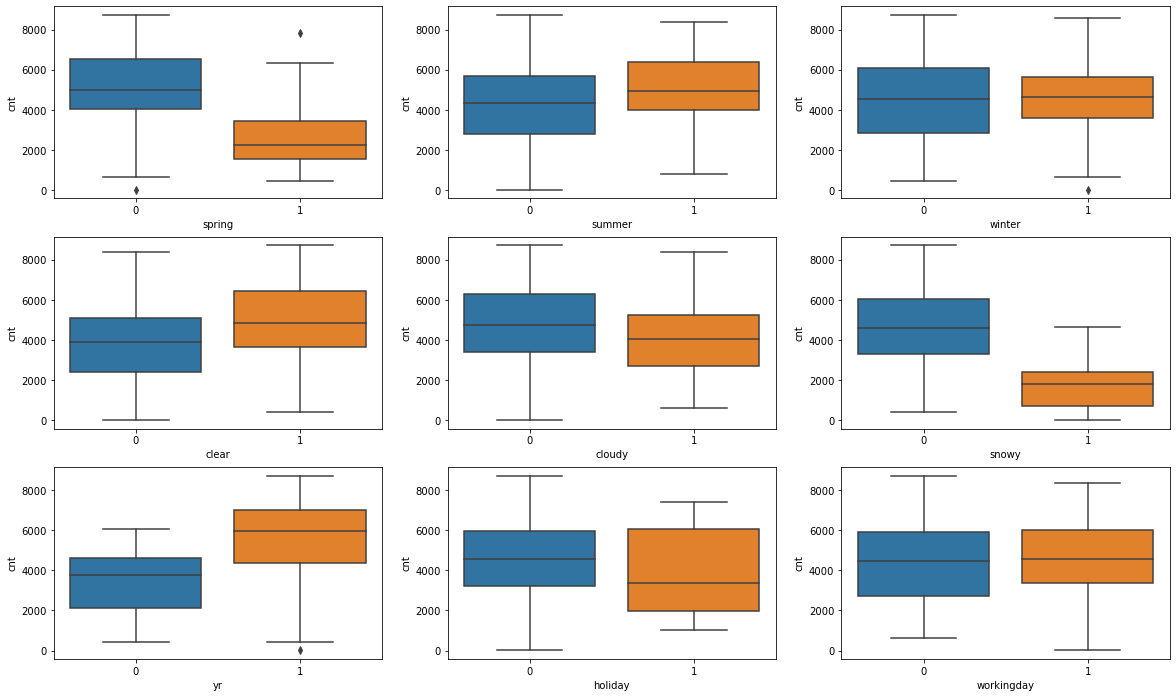

In [153]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'spring', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'summer', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'winter', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'clear', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'cloudy', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'snowy', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,8)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,9)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

## Splitting the Data into Training and Testing Sets

In [154]:
bike.drop(['instant'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)
bike.drop(['dteday'], axis = 1, inplace = True)
bike.drop(['casual'], axis = 1, inplace = True)

In [155]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [156]:
scaler = MinMaxScaler()

In [157]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  clear       730 non-null    uint8  
 14  cloudy      730 non-null    uint8  
 15  snowy       730 non-null    uint8  
 16  day         730 non-null    int64  
dtypes: float64(4), int64(7), uint8(6)
memory usage: 67.1 KB


In [158]:
bike.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,cloudy,snowy,day
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.634247,0.336986,0.028767,15.720548
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.481971,0.473004,0.167266,8.802278
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,23.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


In [159]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['weekday', 'temp', 'atemp', 'mnth', 'hum','windspeed','day']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [160]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,cloudy,snowy,day
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,1,0,0,0.500000
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,1,0,0,1.000000
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,1,0,0.066667
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,1,0,0,0.966667
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,1,0,0.900000


In [161]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,clear,cloudy,snowy,day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.627451,0.343137,0.029412,0.488366
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.483958,0.475223,0.169124,0.294747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.233333
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.500000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


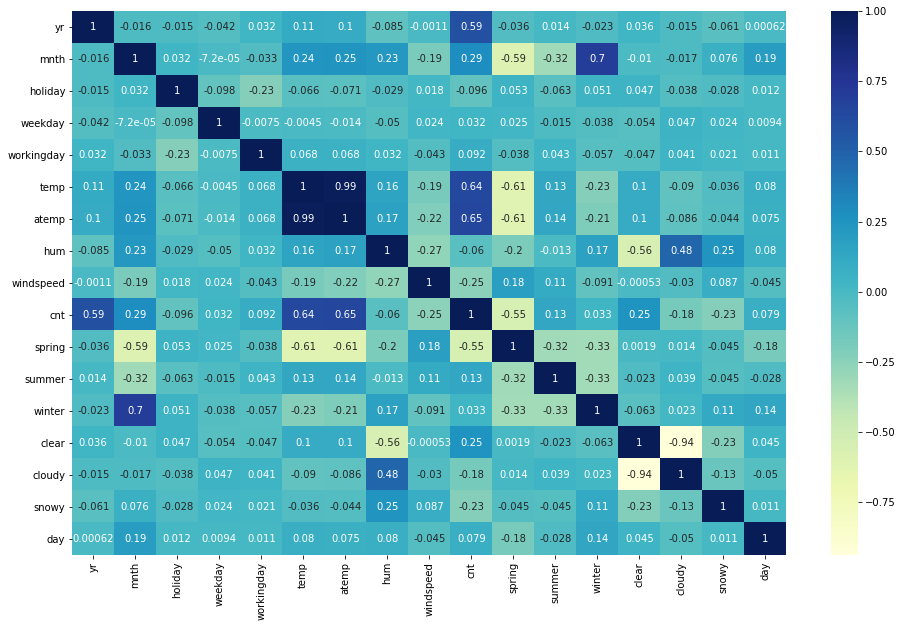

In [162]:
# Checking heapmap of all correlation coefficients

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see temp is highly correlated with count and then clear day is correlated

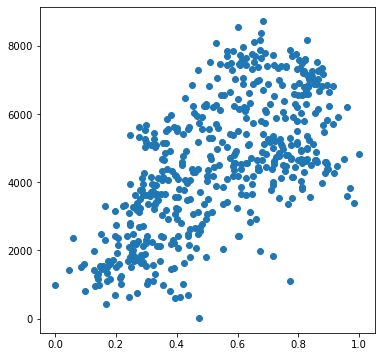

In [163]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

## Adding all the variables to the model

In [164]:
y_train = df_train.pop('cnt')
X_train = df_train

In [165]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          941.366580
yr            2018.410041
mnth           115.414121
holiday       -555.107660
weekday        423.996795
workingday     164.685123
temp          3815.044179
atemp          480.992930
hum          -1073.315719
windspeed    -1545.152322
spring        -622.626528
summer         393.279400
winter         741.494718
clear         1205.548316
cloudy         693.173120
snowy         -957.354857
day            -92.783829
dtype: float64

In [166]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.3
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.74e-181
Time:                        23:45:38   Log-Likelihood:                -4129.5
No. Observations:                 510   AIC:                             8291.
Df Residuals:                     494   BIC:                             8359.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        941.3666    277.277      3.395      0.0

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,58.07
12,clear,56.67
6,atemp,53.69
13,cloudy,36.46
9,spring,5.83
14,snowy,4.54
1,mnth,3.91
11,winter,3.84
10,summer,2.69
7,hum,1.92


In [168]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1)

In [169]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [170]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.39e-182
Time:                        23:45:41   Log-Likelihood:                -4129.6
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        939.2375    276.986      3.391      0.0

In [171]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,clear,56.67
12,cloudy,36.45
8,spring,5.77
13,snowy,4.53
1,mnth,3.91
10,winter,3.73
5,temp,3.52
9,summer,2.61
6,hum,1.92
7,windspeed,1.20


In [172]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth', 1)

In [175]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [176]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.12e-183
Time:                        23:45:56   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        977.2055    266.866      3.662      0.0

In [177]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,clear,51.35
11,cloudy,33.82
7,spring,4.61
12,snowy,4.34
4,temp,3.51
9,winter,3.11
8,summer,2.07
5,hum,1.90
6,windspeed,1.20
1,holiday,1.08


In [178]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('day', 1)

In [179]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [180]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.00e-184
Time:                        23:46:10   Log-Likelihood:                -4130.0
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     497   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        950.4506    264.316      3.596      0.0

In [181]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,clear,49.87
11,cloudy,33.26
7,spring,4.54
12,snowy,4.30
4,temp,3.50
9,winter,3.11
8,summer,2.06
5,hum,1.89
6,windspeed,1.20
1,holiday,1.08


In [182]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('clear', 1)

In [183]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [184]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.00e-184
Time:                        23:46:14   Log-Likelihood:                -4130.0
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     497   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2159.4744    318.152      6.788      0.0

In [185]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.38
4,temp,15.70
6,windspeed,4.69
7,spring,3.90
3,workingday,3.19
2,weekday,3.11
9,winter,3.11
10,cloudy,2.28
8,summer,2.27
0,yr,2.08


In [186]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [187]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [188]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          9.96e-184
Time:                        23:46:29   Log-Likelihood:                -4135.2
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     498   BIC:                             8345.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1597.6382    267.416      5.974      0.0

In [189]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,5.26
5,windspeed,4.63
3,workingday,3.15
2,weekday,3.10
6,spring,2.28
0,yr,2.07
7,summer,1.85
8,winter,1.75
9,cloudy,1.54
1,holiday,1.10


## Residual Analysis of the train data

In [190]:
y_train_price = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

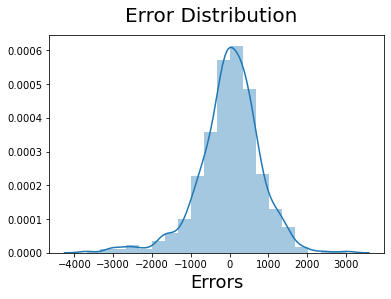

In [191]:
# Distributed plot of the error
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         

## Making Predictions Using the Final Model

In [193]:
# Apply scaler() to all the columns of test data
num_vars = ['weekday', 'temp', 'atemp', 'mnth', 'hum','windspeed','day']

df_test[num_vars] = scaler.transform(df_test[num_vars]) 

In [194]:
df_test.shape

(219, 17)

In [195]:
y_test = df_test.pop('cnt')
X_test = df_test

In [196]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [197]:
X_test_lm = X_test_lm.drop(["workingday", "temp", "hum","clear","day","mnth","atemp"], axis = 1)

In [199]:
# Making predictions using the eigth model

y_test_pred = lr_6.predict(X_test_lm)

ValueError: shapes (219,10) and (12,) not aligned: 10 (dim 1) != 12 (dim 0)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

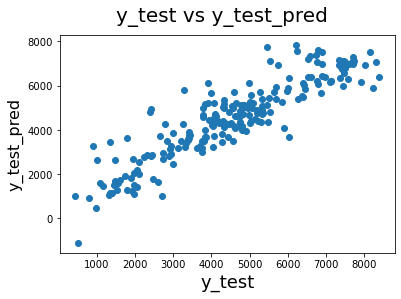

In [200]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 

In [201]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8050115817924302